In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
#replace the '/home/karl/Astroplan/astroplan' with wherever the directory is
sys.path.insert(0,'/home/karl/Astroplan/astroplan')

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astroplan
import astroplan.constraints
from astroplan import Observer, FixedTarget, ObservingBlock
from astroplan import PriorityScheduler, SequentialScheduler, Transitioner
from astroplan import plots
color_cycle = plots.mplstyles.astropy_mpl_style['axes.color_cycle']

In [4]:
start_time = Time.now()
end_time = start_time+48*u.hour
print(start_time,end_time)

2016-06-21 07:54:33.970009 2016-06-23 07:54:33.970009


In [5]:
min_exposure=2*u.hour
times = start_time + u.Quantity(np.arange(0,(end_time - start_time).value, min_exposure.to(u.day).value), unit=u.day)

In [6]:
(2*u.hour).to(u.day).value

0.08333333333333333

In [7]:
mdm = Observer.at_site('mdm')

In [8]:
targets = [FixedTarget.from_name('Vega'),
           FixedTarget.from_name('Deneb'),
           FixedTarget.from_name('Arcturus'),
           FixedTarget.from_name('Altair'),
           FixedTarget.from_name('Aldebaran'),
           FixedTarget.from_name('Sirius'),
           FixedTarget.from_name('Betelgeuse'),
           FixedTarget.from_name('Rigel'),
           FixedTarget.from_name('Castor'),
           FixedTarget.from_name('Pollux'),
           FixedTarget.from_name('Polaris')
          ]
targets

[<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>,
 <FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>,
 <FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>,
 <FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>,
 <FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>,
 <FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>,
 <FixedTarget "Rigel" at SkyCoord (ICRS): (ra, dec) in deg (78.63446707, -8.20163837)>,
 <FixedTarget "Castor" at SkyCoord (ICRS): (ra, dec) in deg (113.64947164, 31.88828222)>,
 <FixedTarget "Pollux" at SkyCoord (ICRS): (ra, dec) in deg (116.32895777, 28.02619889)>,
 <FixedTarget "Polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>]

In [9]:
etime = 5*u.min
n = 10
rot = 55*u.second

blocks = []
for i,t in enumerate(targets):
    #i is used as the priority
    blocks.append(ObservingBlock.from_exposures(t, i, etime, n, rot))

In [10]:
constraints = [astroplan.constraints.AirmassConstraint(3, boolean_constraint=False),
               astroplan.constraints.AtNightConstraint()
               ]

In [11]:
observable = constraints[0].compute_constraint(times,mdm,[targets[0]])

In [12]:
scheduler = PriorityScheduler(start_time, end_time,
                                constraints=constraints, observer=mdm)
schedule = scheduler(blocks)

In [13]:
all_blocks = schedule.scheduled_blocks
print(schedule)


Altair starting @ 2016-06-21 08:49:33.970 lasting 59.16666666666667 min
Aldebaran starting @ 2016-06-21 09:54:33.970 lasting 59.16666666666667 min
Sirius starting @ 2016-06-21 10:59:33.969 lasting 59.16666666666667 min
Arcturus starting @ 2016-06-22 03:09:33.966 lasting 59.16666666666667 min
Betelgeuse starting @ 2016-06-22 04:14:33.966 lasting 59.16666666666667 min
Rigel starting @ 2016-06-22 05:19:33.965 lasting 59.16666666666667 min
Castor starting @ 2016-06-22 06:24:33.965 lasting 59.16666666666667 min
Vega starting @ 2016-06-22 07:29:33.965 lasting 59.16666666666667 min
Deneb starting @ 2016-06-22 09:34:33.964 lasting 59.16666666666667 min
Polaris starting @ 2016-06-22 11:29:33.964 lasting 59.16666666666667 min
Pollux starting @ 2016-06-23 02:39:33.961 lasting 59.16666666666667 min
done


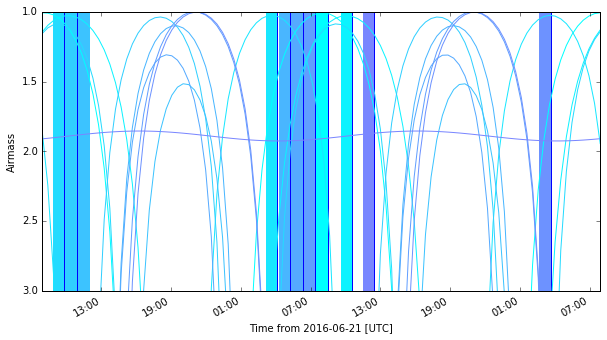

In [14]:
plt.figure(figsize=(10,5))
ts = start_time + np.linspace(0, (end_time-start_time).value, 100)*u.day
targ_to_color = {}
color_idx = np.linspace(0, 1, len(all_blocks))
for target, ci in zip(targets, color_idx):
    plots.plot_airmass(target, mdm, ts, style_kwargs=dict(color=plt.cm.cool(ci)))
    targ_to_color[target.name] = plt.cm.cool(ci)
#plt.legend(loc=2)

for block in all_blocks:
    if hasattr(block, 'target'):
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    fc=targ_to_color[block.target.name], lw=0)
    else:
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    lw=0)
ax=plt.gca()